# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**



- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

The ultimate objective is to prepare the model for deployment as part of an automated monitoring system. This system will enable real-time analysis of images and assist in ensuring compliance with workplace safety regulations.

## **Data Description**

The dataset consists of **640 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

## Installing and Importing the Necessary Libraries

In [ ]:
!pip install numpy==1.25.2 pandas==2.0.3 seaborn==0.13.1 tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib==3.7.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing insta

In [ ]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# **Data Overview**


##Loading the data

In [ ]:
# Uncomment and run the following code in case Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/HelmNet/images (1).npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HelmNet/Labels (1).csv')

In [ ]:
print(images.shape)

print(labels.shape)

(631, 200, 200, 3)
(631, 1)


# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

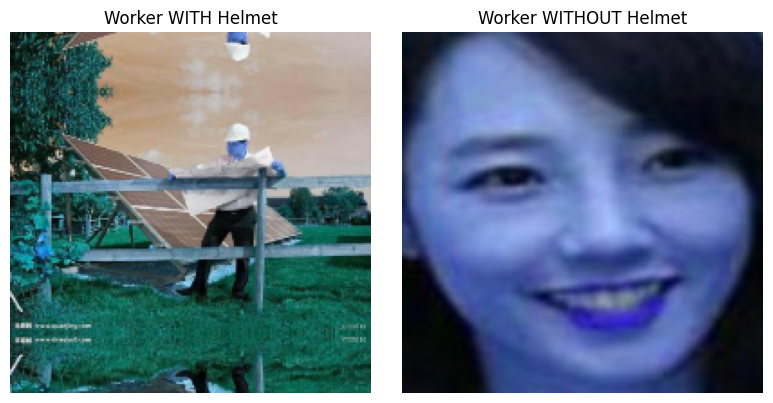

In [ ]:
helmet_indices = np.where(labels == 1)[0]  # Indices of images with helmets
no_helmet_indices = np.where(labels == 0)[0]  # Indices of images without helmets

# Select one image from each class
helmet_img = images[np.random.choice(helmet_indices)]
no_helmet_img = images[np.random.choice(no_helmet_indices)]

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display "With Helmet" image
axes[0].imshow(helmet_img)
axes[0].set_title("Worker WITH Helmet")
axes[0].axis('off')

# Display "Without Helmet" image
axes[1].imshow(no_helmet_img)
axes[1].set_title("Worker WITHOUT Helmet")
axes[1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

##Count Plot for each category


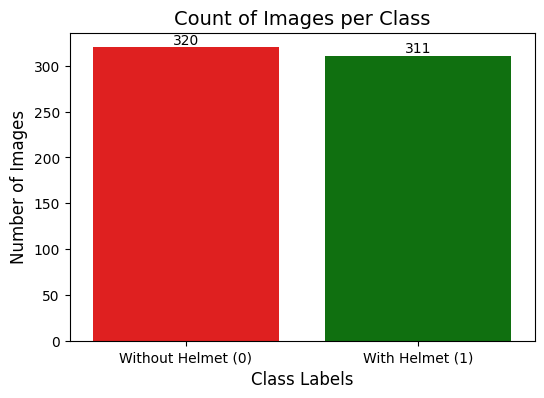

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=labels.iloc[:, 0], palette=['red', 'green'])  # Assuming the first column is the label

# Add exact counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, )

# Add labels
plt.xlabel("Class Labels", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Count of Images per Class", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Without Helmet (0)", "With Helmet (1)"])  # Rename x-axis labels

# Show plot
plt.show()

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

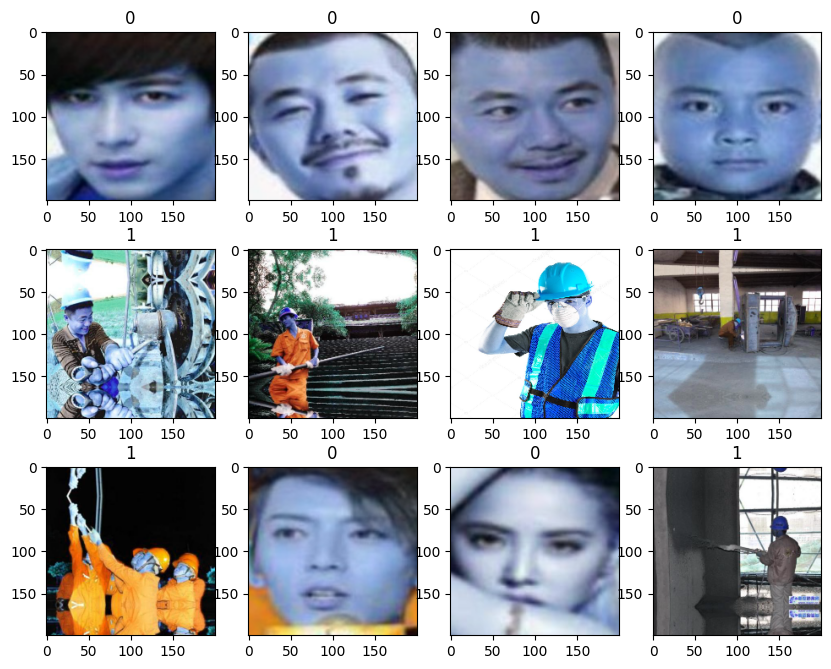

In [ ]:
plot_images(images,labels)

###Key meaningful observations from EDA

# **Data Preprocessing**

### Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 200 to 64.

In [ ]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

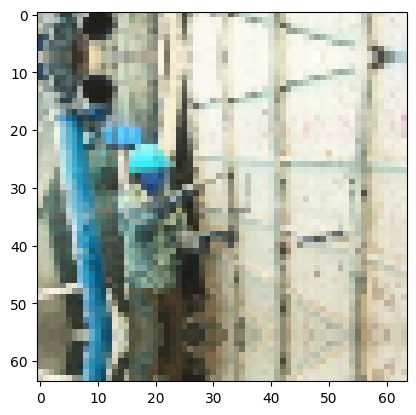

In [ ]:
plt.imshow(images_decreased[3]);

Since the image is already blurred, there's no need to reduce its size.

## Converting images to grayscale

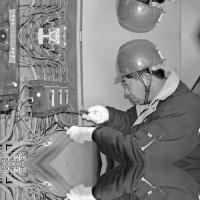

In [ ]:
images_gray = []
for i in range(len(images_decreased)):
    img_gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    images_gray.append(img_gray)

# Display a sample grayscale image
cv2_imshow(images_gray[6])

### Visualizing images using Gaussian Blur

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images_decreased)):
  images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(3,3),sigmaX =  0))


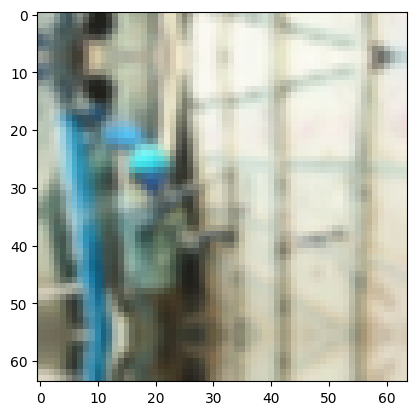

In [ ]:
plt.imshow(images_gb[3]);

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

### Splitting the dataset



- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(504, 200, 200, 3) (504, 1)
(63, 200, 200, 3) (63, 1)
(64, 200, 200, 3) (64, 1)


### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

### Utility Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [ ]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

# **Model Building**

**Model Evaluation Criterion**

 By applying label encoding, we assign:
- **With Helmet:** Workers who are wearing safety helmets as 1.
- **Without Helmet:** Workers who are not wearing safety helmets as 0.




**Which case is important ?**

1️⃣ **False Positive (FP)**: Predicts "With Helmet" when actually "Without Helmet" → Dangerous! 🚨

**Risk**: Undetected safety violations can lead to serious injuries.


2️⃣ **False Negative (FN)**: Predicts "Without Helmet" when actually "With Helmet" → Less severe.

**Impact**: Worker gets unnecessary warnings but stays safe.

**How to reduce False Positive ?**

To reduce False Positives, we need to focus on improving precision that is the metric we are choosing.

**Precision= TP/(TP+FP)**

Here we can see that ,By reducing False Positives, we can maximize True Positive value
, which is crucial for achieving this goal.

​





##Model 1 Convolutional Neural Network (CNN)[Base]

Let's build a **CNN Model**.<br>

The model has 2 main parts:
1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers for prediction.**<br><br>





In [ ]:

# Initializing Model
model_1 = Sequential()

# Convolutional layers with increasing filters
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(200, 200, 3)))
model_1.add(MaxPooling2D((2, 2), padding='same'))
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((4, 4), padding='same'))
model_1.add(MaxPooling2D((4, 4), padding='same'))
model_1.add(MaxPooling2D((4, 4), padding='same'))
model_1.add(Conv2D(16, (1, 1), activation='relu', padding="same"))


# Flatten and Dense layers
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile with Adam Optimizer
opt = Adam(learning_rate=0.01)
model_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy","Precision"])

# Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                        

In [ ]:
history_1 = model_1.fit(
            X_train_normalized, y_train,
            epochs=10,
            validation_split=0.1,
            shuffle=True,
            batch_size=32,
            verbose=2
)

Epoch 1/10
15/15 - 24s - loss: 0.6127 - accuracy: 0.6424 - precision: 0.5886 - val_loss: 0.4776 - val_accuracy: 0.6667 - val_precision: 0.5854 - 24s/epoch - 2s/step
Epoch 2/10
15/15 - 23s - loss: 0.1914 - accuracy: 0.9205 - precision: 0.9159 - val_loss: 0.0920 - val_accuracy: 0.9608 - val_precision: 1.0000 - 23s/epoch - 2s/step
Epoch 3/10
15/15 - 21s - loss: 0.1827 - accuracy: 0.9470 - precision: 0.9630 - val_loss: 0.0980 - val_accuracy: 0.9608 - val_precision: 1.0000 - 21s/epoch - 1s/step
Epoch 4/10
15/15 - 21s - loss: 0.0370 - accuracy: 0.9912 - precision: 0.9955 - val_loss: 0.0656 - val_accuracy: 0.9804 - val_precision: 1.0000 - 21s/epoch - 1s/step
Epoch 5/10
15/15 - 22s - loss: 0.0241 - accuracy: 0.9934 - precision: 0.9955 - val_loss: 0.0064 - val_accuracy: 1.0000 - val_precision: 1.0000 - 22s/epoch - 1s/step
Epoch 6/10
15/15 - 21s - loss: 0.0154 - accuracy: 0.9934 - precision: 0.9955 - val_loss: 0.0043 - val_accuracy: 1.0000 - val_precision: 1.0000 - 21s/epoch - 1s/step
Epoch 7/10

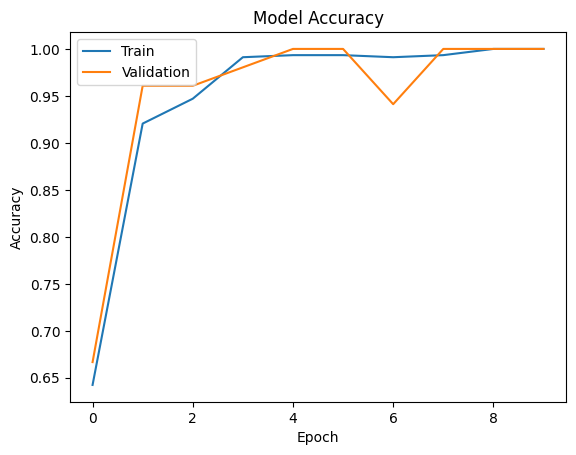

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train)

print("Train performance metrics")
print(model_1_train_perf)

16/16 [==============================] - 7s 422ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 [==============================] - 8s 440ms/step


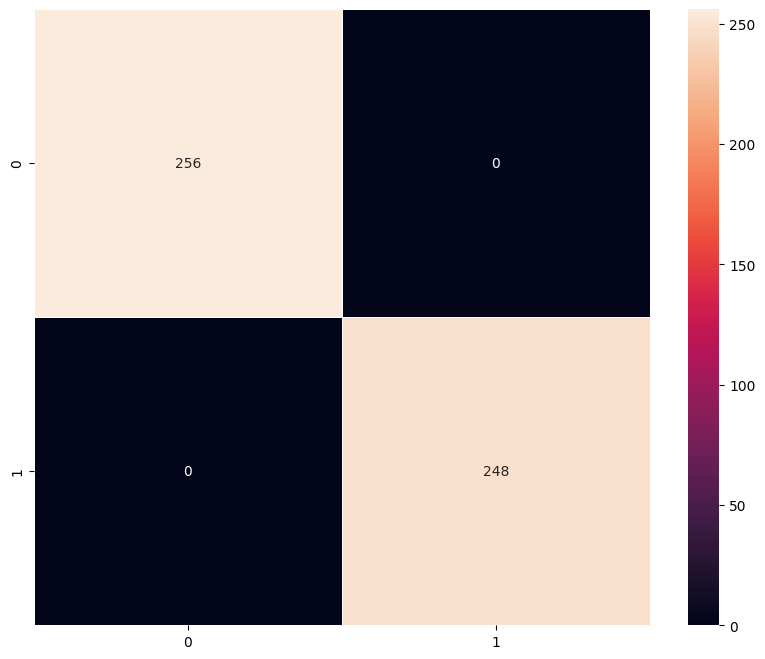

In [ ]:
plot_confusion_matrix(model_1,X_train_normalized,y_train)

In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_1_valid_perf)

2/2 [==============================] - 1s 402ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 [==============================] - 1s 378ms/step


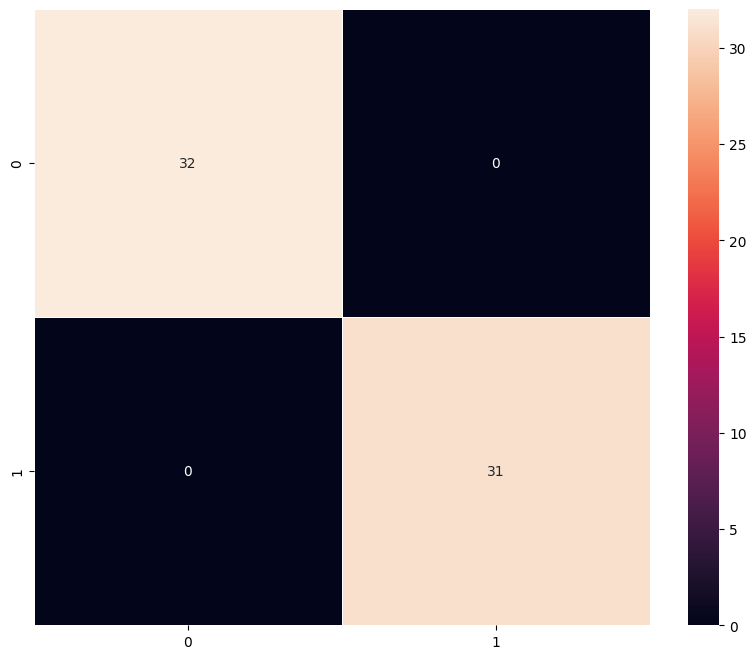

In [ ]:
plot_confusion_matrix(model_1,X_val_normalized,y_val)

### Vizualizing the prediction

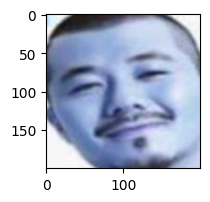

1/1 [==============================] - 0s 32ms/step
Predicted Label: 0
True Label: Label    0
Name: 320, dtype: int64


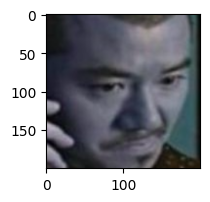

1/1 [==============================] - 0s 34ms/step
Predicted Label: 0
True Label: Label    1
Name: 552, dtype: int64


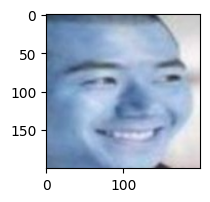

1/1 [==============================] - 0s 33ms/step
Predicted Label: 0
True Label: Label    1
Name: 578, dtype: int64


In [ ]:
# For index 2
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()

prediction = model_1.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = np.argmax(prediction)  # Extract the predicted class label

print('Predicted Label:', predicted_label)

# Fix indexing issue in y_test
true_label = y_test.iloc[2] if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test[2]
print('True Label:', true_label)

# For index 33
plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()

prediction = model_1.predict(X_val_normalized[33].reshape(1,200,200,3))
predicted_label = np.argmax(prediction)

print('Predicted Label:', predicted_label)

true_label = y_test.iloc[33] if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test[33]
print('True Label:', true_label)

# For index 36
plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()

prediction = model_1.predict(X_val_normalized[36].reshape(1,200,200,3))
predicted_label = np.argmax(prediction)

print('Predicted Label:', predicted_label)

true_label = y_test.iloc[36] if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test[36]
print('True Label:', true_label)



## Model 2 (VGG-16 (Base))

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer.


In [ ]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(200,200,3))
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

# Adding a dense output layer
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
opt=Adam()
# Compile model
model_2.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy","Precision"])

In [ ]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 18433     
                                                                 
Total params: 14733121 (56.20 MB)
Trainable params: 18433 (72.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator()

In [ ]:
# Epochs
epochs = 5
# Batch size
batch_size = 64

history_vgg16 = model_2.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/5
7/7 [==============================] - 135s 19s/step - loss: 0.3379 - accuracy: 0.8545 - precision: 0.8400 - val_loss: 0.0553 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 2/5
7/7 [==============================] - 123s 18s/step - loss: 0.0327 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 3/5
7/7 [==============================] - 122s 18s/step - loss: 0.0105 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 4/5
7/7 [==============================] - 125s 19s/step - loss: 0.0053 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 5/5
7/7 [==============================] - 129s 19s/step - loss: 0.0040 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000 - val_precision: 1.0000


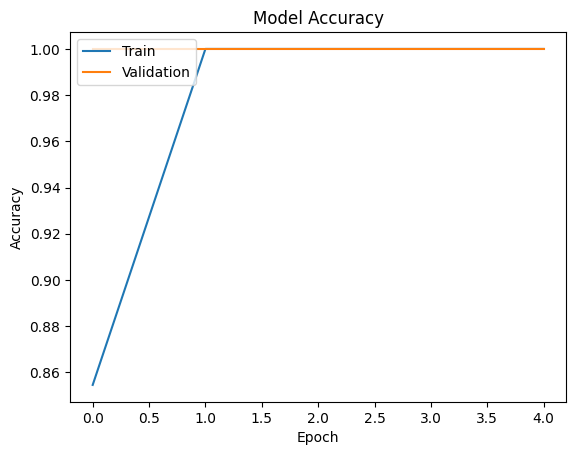

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train_normalized,y_train)

print("Train performance metrics")
print(model_2_train_perf)

16/16 [==============================] - 134s 8s/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 [==============================] - 131s 8s/step


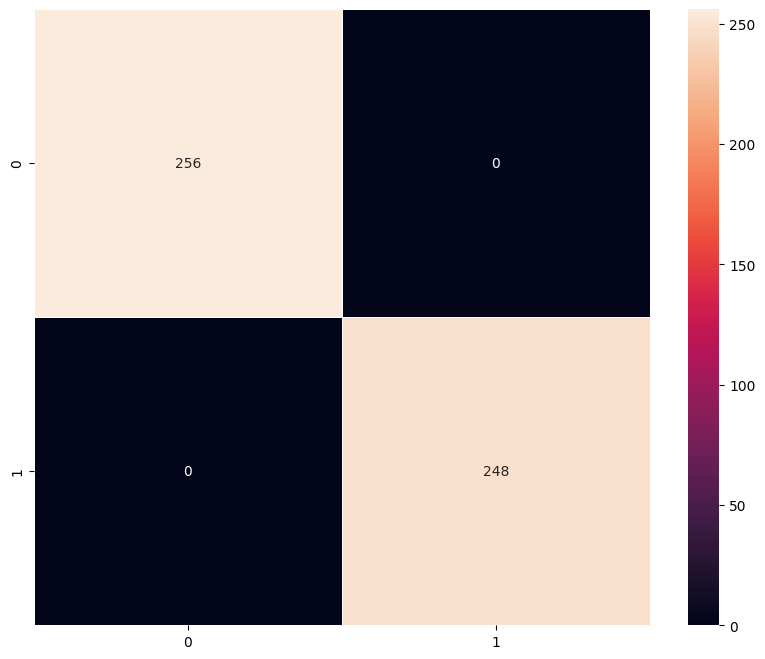

In [ ]:
plot_confusion_matrix(model_2,X_train_normalized,y_train)

In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_2_valid_perf)

2/2 [==============================] - 16s 8s/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 [==============================] - 15s 7s/step


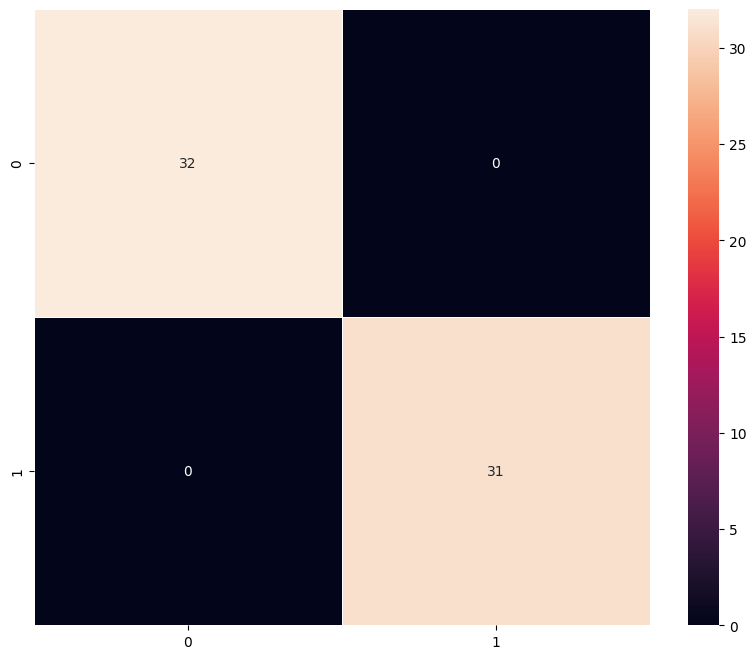

In [ ]:
plot_confusion_matrix(model_2,X_val_normalized,y_val)

### Visualizing the prediction:

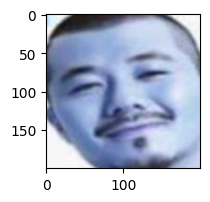

1/1 [==============================] - 0s 223ms/step
Predicted Label: 0
True Label: Label    0
Name: 320, dtype: int64


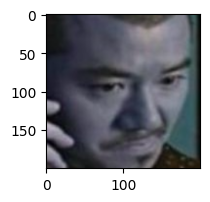

1/1 [==============================] - 0s 218ms/step
Predicted Label: 0
True Label: Label    1
Name: 552, dtype: int64


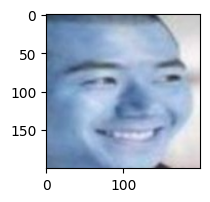

1/1 [==============================] - 0s 224ms/step
Predicted Label: 0
True Label: Label    1
Name: 578, dtype: int64


In [ ]:
# For index 2
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()

prediction = model_2.predict(X_val_normalized[2].reshape(1,200,200,3))  # Model prediction
predicted_label =([np.argmax(prediction)])  # Convert to original label

print('Predicted Label:', predicted_label[0])

# Fix indexing issue in y_test
true_label = ([y_test.iloc[2]]) if isinstance(y_test, (pd.DataFrame, pd.Series)) else enc.inverse_transform([y_test[2]])
print('True Label:', true_label[0])

# For index 33
plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()

prediction = model_2.predict(X_val_normalized[33].reshape(1,200,200,3))
predicted_label = ([np.argmax(prediction)])

print('Predicted Label:', predicted_label[0])

true_label = ([y_test.iloc[33]]) if isinstance(y_test, (pd.DataFrame, pd.Series)) else enc.inverse_transform([y_test[33]])
print('True Label:', true_label[0])

# For index 36
plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()

prediction = model_2.predict(X_val_normalized[36].reshape(1,200,200,3))
predicted_label = ([np.argmax(prediction)])

print('Predicted Label:', predicted_label[0])

true_label = ([y_test.iloc[36]]) if isinstance(y_test, (pd.DataFrame, pd.Series)) else enc.inverse_transform([y_test[36]])
print('True Label:', true_label[0])                                            # using inverse_transform() to get the output label from the output vector

## Model 3 (VGG-16 (Base + FFNN))

- We will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten layer and a Feed Forward Neural Network.


In [ ]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = Adam()

In [ ]:
# Compile model
model_3.compile(optimizer=opt,   loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy","Precision"])

In [ ]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               4718848   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                8224      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19441793 (74.16 MB)
Trainable params: 47

In [ ]:
history_3 = model_3.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/5
7/7 [==============================] - 130s 19s/step - loss: 0.5376 - accuracy: 0.7341 - precision: 0.7078 - val_loss: 0.0342 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 2/5
7/7 [==============================] - 125s 18s/step - loss: 0.0282 - accuracy: 0.9932 - precision: 0.9954 - val_loss: 5.2338e-04 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 3/5
7/7 [==============================] - 125s 18s/step - loss: 0.0158 - accuracy: 0.9978 - precision: 0.9955 - val_loss: 3.8637e-05 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 4/5
7/7 [==============================] - 123s 18s/step - loss: 0.0010 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 3.8163e-05 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 5/5
7/7 [==============================] - 124s 18s/step - loss: 0.0011 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 3.7804e-05 - val_accuracy: 1.0000 - val_precision: 1.0000


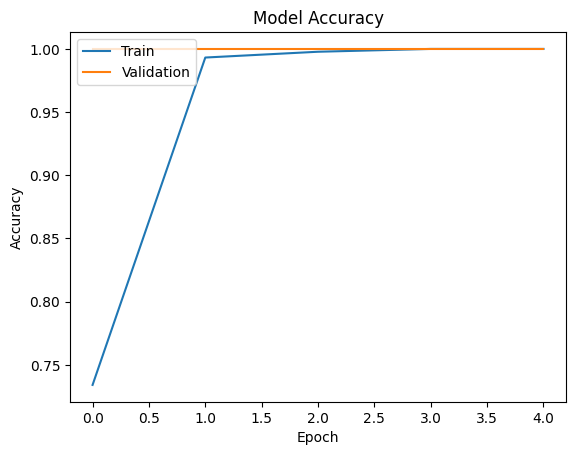

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train)

print("Train performance metrics")
print(model_3_train_perf)

16/16 [==============================] - 122s 8s/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 [==============================] - 122s 8s/step


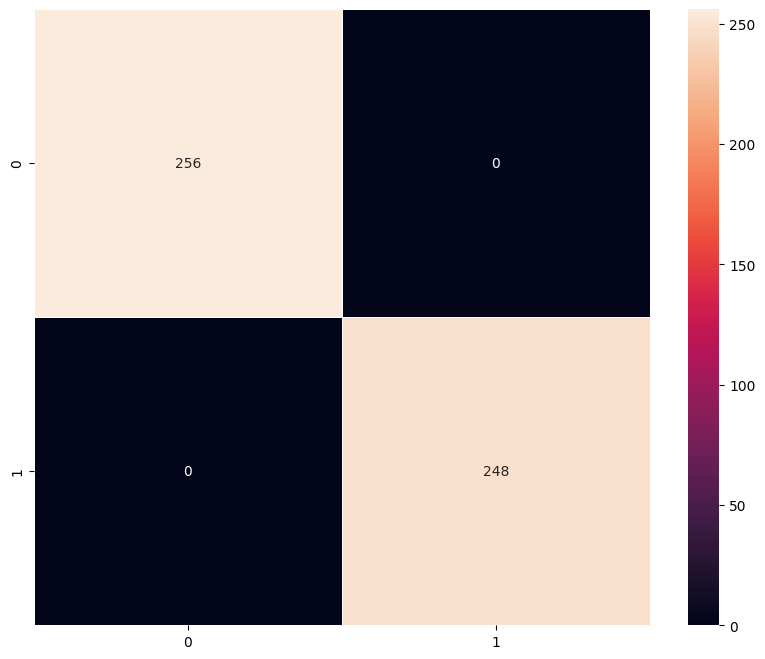

In [ ]:
plot_confusion_matrix(model_3,X_train_normalized,y_train)

In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_3_valid_perf)

2/2 [==============================] - 15s 8s/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 [==============================] - 15s 7s/step


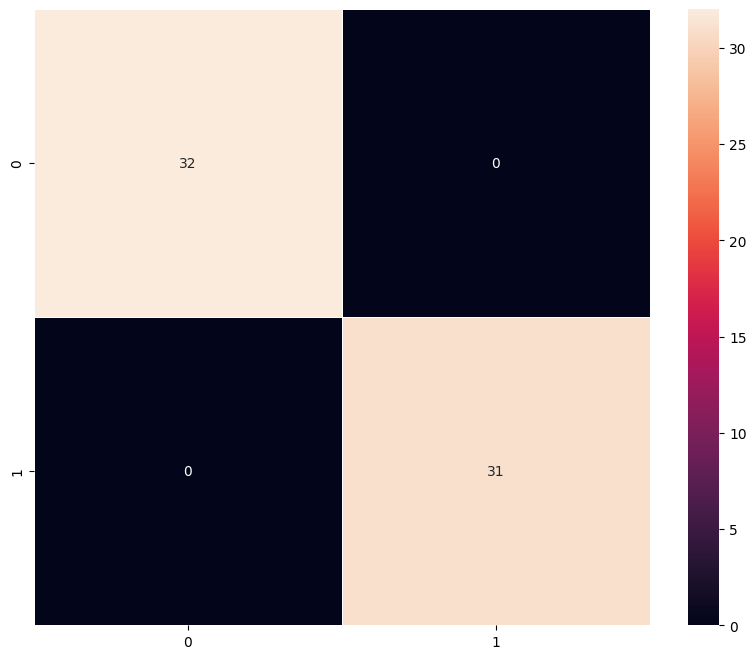

In [ ]:
plot_confusion_matrix(model_3,X_val_normalized,y_val)

## Model 4 (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
model_4 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_4.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_4.add(Flatten())

#Adding the Feed Forward neural network
model_4.add(Dense(256,activation='relu'))
model_4.add(Dropout(rate=0.4))
model_4.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
opt=Adam()
# Compile model
model_4.compile(optimizer=opt,   loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy","Precision"])

In [ ]:
# Generating the summary of the model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               4718848   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                8224      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19441793 (74.16 MB)
Trainable params: 47

In [ ]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2,shear_range=0.3,zoom_range=0.4
                              )

In [ ]:
history_4 = model_4.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/5
7/7 [==============================] - 136s 20s/step - loss: 0.6549 - accuracy: 0.7614 - precision: 0.7610 - val_loss: 0.0212 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 2/5
7/7 [==============================] - 132s 19s/step - loss: 0.0682 - accuracy: 0.9727 - precision: 0.9858 - val_loss: 8.9626e-04 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 3/5
7/7 [==============================] - 135s 20s/step - loss: 0.0216 - accuracy: 0.9866 - precision: 0.9865 - val_loss: 1.2833e-04 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 4/5
7/7 [==============================] - 131s 19s/step - loss: 0.0124 - accuracy: 0.9977 - precision: 0.9954 - val_loss: 1.6055e-04 - val_accuracy: 1.0000 - val_precision: 1.0000
Epoch 5/5
7/7 [==============================] - 132s 19s/step - loss: 0.0169 - accuracy: 0.9909 - precision: 0.9863 - val_loss: 3.1200e-04 - val_accuracy: 1.0000 - val_precision: 1.0000


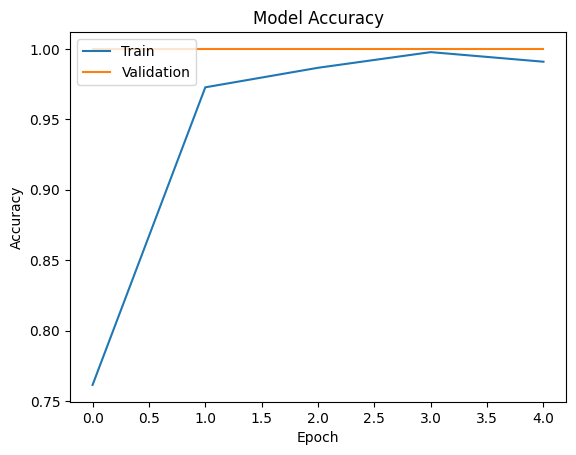

In [ ]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train_normalized,y_train)

print("Train performance metrics")
print(model_4_train_perf)

16/16 [==============================] - 125s 8s/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 [==============================] - 124s 8s/step


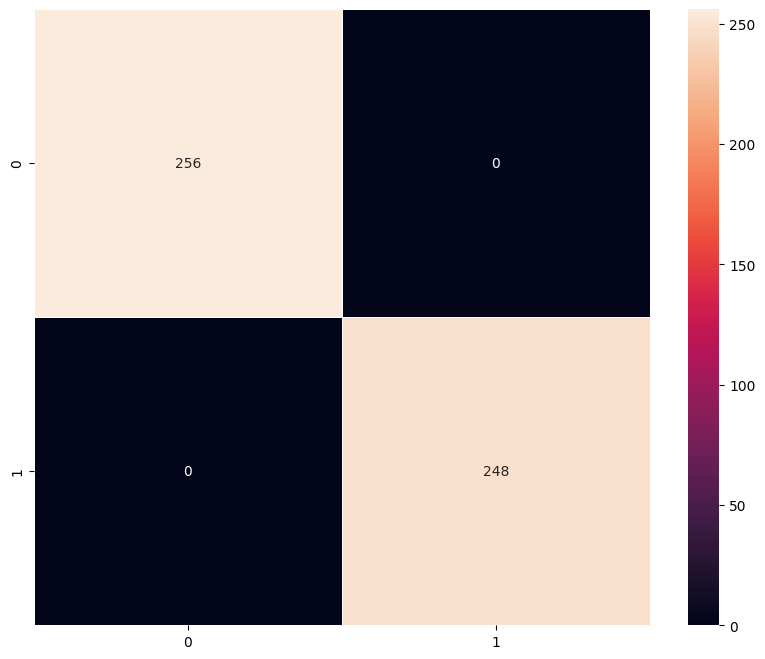

In [ ]:
plot_confusion_matrix(model_4,X_train_normalized,y_train)

In [ ]:
model_4_valid_perf = model_performance_classification(model_4, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_4_valid_perf)

2/2 [==============================] - 15s 8s/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 [==============================] - 15s 7s/step


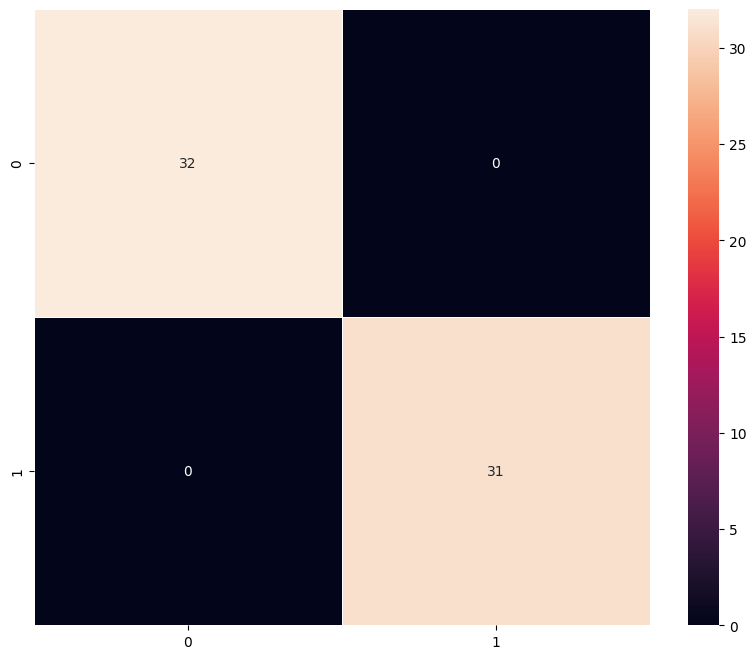

In [ ]:
plot_confusion_matrix(model_4,X_val_normalized,y_val)

# **Model Performance Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "CNN (Base)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "CNN (Base)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_train_comp_df

,CNN (Base),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0
F1 Score,1.0,1.0,1.0,1.0


In [ ]:
models_valid_comp_df

,CNN (Base),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0
F1 Score,1.0,1.0,1.0,1.0


In [ ]:
models_train_comp_df - models_valid_comp_df

,CNN (Base),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.0,0.0,0.0,0.0
Recall,0.0,0.0,0.0,0.0
Precision,0.0,0.0,0.0,0.0
F1 Score,0.0,0.0,0.0,0.0


## Final Model Selection

In [ ]:
model_4_test_perf = model_performance_classification(model_4, X_test_normalized,y_test)

2/2 [==============================] - 16s 7s/step


In [ ]:
model_4_test_perf

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 [==============================] - 16s 9s/step


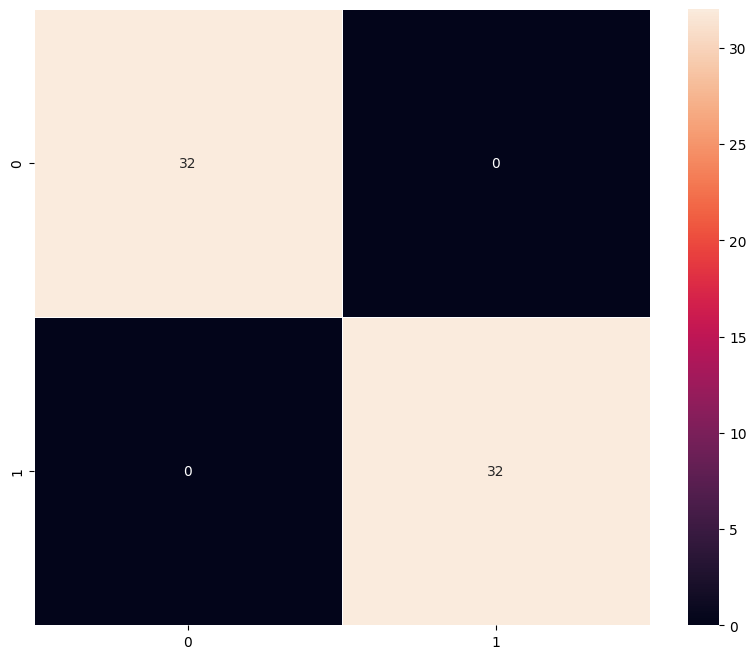

In [ ]:
plot_confusion_matrix(model_4, X_test_normalized,y_test)
